In [74]:
import numpy as np

from matplotlib.patches import Ellipse
import matplotlib.cm as cm

import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [75]:
no_classes=2
no_samples=250
iterations=100


(2, 25)
(2, 50)
(2, 75)
(2, 100)


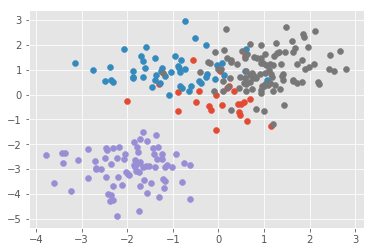

[[  4.93047695e-01  -3.89346683e-01]
 [  5.91712781e-01   1.54062018e+00]
 [ -2.11545327e-01  -4.55696268e-01]
 [  5.59993009e-01  -3.00959437e-01]
 [ -1.62112649e-01  -6.06226041e-01]
 [ -8.76105747e-01  -6.64921460e-01]
 [ -5.62818667e-02  -1.44288928e+00]
 [  3.46757255e-01   1.51146085e-01]
 [ -5.56016719e-02  -3.33054966e-02]
 [  4.81643480e-01  -8.12431995e-01]
 [ -5.60886188e-01   1.39282987e+00]
 [  6.24909964e-01  -1.06833420e+00]
 [ -4.33129490e-01   1.47889505e-01]
 [  1.89984445e-01   2.73271708e-01]
 [  1.14518887e+00  -1.26349276e+00]
 [  6.82662610e-01  -1.74192555e-01]
 [  2.80033902e-02   9.53920693e-01]
 [ -1.29758540e+00   4.39543794e-01]
 [  2.29505004e-01   3.58117510e-01]
 [ -4.90667442e-01  -3.06121914e-01]
 [  6.95104290e-02  -4.33727101e-01]
 [ -8.84854595e-01   8.64762015e-02]
 [ -1.99566662e+00  -2.40635835e-01]
 [  4.37381261e-01  -3.89854765e-01]
 [  4.53328139e-01  -6.88440248e-01]
 [ -1.24960342e+00   9.54671809e-01]
 [ -3.14474279e+00   1.25558901e+00]
 

In [76]:
params=[0.1,0.2,0.3,0.4]
means=[[0,0],[-1,1],[-2,-3],[1,1]]
cov=[[[0.5,0],[0,0.5]],[[1,0],[0,0.3]],[[0.5,0],[0,0.5]],[[0.5,0],[0,0.5]]]
points_array=[]
for i,param in enumerate(params):
    x,y=np.random.multivariate_normal(mean=means[i],cov=cov[i],size=int(no_samples*param)).T
    plt.scatter(x,y)
    points_array.append(np.array([x,y]).T)
    print(np.array([x,y]).shape)
plt.show()
    
points_array=np.vstack(points_array)   
print(points_array)        

In [77]:
class Kmeans:
    def KNN(points_array,no_classes):  
        means=np.random.uniform(-10,10,[no_classes,2])


        prev_means=0
        epsillon=0.00001
        while np.linalg.norm(means-prev_means)>epsillon:
            prev_means=means

            clusters_list=[[] for i in range(no_classes)]
            for point in points_array:
                clusters_list[np.argmin(np.array(np.array([np.linalg.norm(point-mean) for mean in means])))].append(point)
            means=[]    
            for i in range(no_classes):
                if len(clusters_list[i])!=0:
                    means.append(np.mean(clusters_list[i],axis=0))
                else:
                    means.append(np.random.uniform(-10,10,2))

            means=np.array(means) 
        cluster_covariances,cluster_means,cluster_fracs=np.array([]),np.array([]),np.array([])

        for cluster in clusters_list:
            cluster_means=np.append(cluster_means,np.mean(np.array(cluster),axis=0))
            cluster_covariances=np.append(cluster_covariances,np.cov(np.array(cluster).T))
            cluster_fracs=np.append(cluster_fracs,len(cluster))
        cluster_fracs/=np.sum(cluster_fracs)
        cluster_covariances=np.reshape(cluster_covariances,[-1,2,2])
        cluster_means=np.reshape(cluster_means,[-1,2])
        return cluster_covariances,cluster_means,cluster_fracs

In [78]:
def normal_density(X,mean,covar):
    return 1/np.sqrt(np.linalg.det(2*np.pi*covar))*np.exp(-0.5*np.dot(np.dot((X-mean).T,np.linalg.pinv(covar)),(X-mean)))
   

In [79]:
covariances,means,mixing_factors=Kmeans.KNN(points_array,no_classes)
print(covariances,means)

[[[ 0.50783838 -0.00322958]
  [-0.00322958  0.52266467]]

 [[ 1.43748597  0.09240942]
  [ 0.09240942  0.63273382]]] [[-1.94780987 -2.95126196]
 [ 0.28794122  0.82072595]]


In [80]:
normal_density(points_array[81],means[1],covariances[1])

5.3338205926490428e-11

In [81]:
iterations=100
def fill_prob_matrix(points,n_classes,n_samples,n_means,n_mixing_factors,n_covariances):
    #print(points,n_classes,n_samples,n_means,n_mixing_factors,n_covariances)
    probability_matrix=np.ones([n_samples,n_classes])  
    for i,point in enumerate(points):
        for k in range(n_classes):
            
            probability_matrix[i,k]=n_mixing_factors[k]*normal_density(point,n_means[k],n_covariances[k])
        probability_matrix[i]=probability_matrix[i]/np.sum(probability_matrix[i])    
    return probability_matrix        

In [82]:
test_matrix=fill_prob_matrix(points_array,no_classes,no_samples,means,mixing_factors,covariances)
print(test_matrix)

[[  1.30189581e-05   9.99986981e-01]
 [  7.58907886e-12   1.00000000e+00]
 [  3.73113788e-04   9.99626886e-01]
 [  5.19325094e-06   9.99994807e-01]
 [  8.59622005e-04   9.99140378e-01]
 [  1.28856401e-02   9.87114360e-01]
 [  1.27728516e-01   8.72271484e-01]
 [  5.84902656e-07   9.99999415e-01]
 [  1.14089385e-05   9.99988591e-01]
 [  2.45023852e-04   9.99754976e-01]
 [  2.80158306e-09   9.99999997e-01]
 [  7.08180511e-04   9.99291819e-01]
 [  1.30473090e-05   9.99986953e-01]
 [  4.89413912e-07   9.99999511e-01]
 [  1.95901433e-04   9.99804099e-01]
 [  1.20226131e-06   9.99998798e-01]
 [  7.39769370e-09   9.99999993e-01]
 [  2.16148179e-05   9.99978385e-01]
 [  2.26634375e-07   9.99999773e-01]
 [  3.59121070e-04   9.99640879e-01]
 [  1.08969887e-04   9.99891030e-01]
 [  8.34392101e-05   9.99916561e-01]
 [  8.28553194e-03   9.91714468e-01]
 [  1.68155861e-05   9.99983184e-01]
 [  1.20292207e-04   9.99879708e-01]
 [  5.14959997e-07   9.99999485e-01]
 [  7.71473782e-07   9.99999229e-01]
 

In [83]:
def update_params(n_means,n_covariances,n_mixing_factors,probability_matrix):
    
    probability_matrix_T=probability_matrix.T
    covariance_matrix=np.zeros([2,2])
    updated_covariance_matrices=[]
    updated_means=np.array([np.inner(probability_matrix_T[k],points_array.T)/np.sum(probability_matrix_T[k]) for k in range(no_classes)])

    updated_mixing_factors=np.array([1/no_samples*(np.sum(probability_matrix_T[k])) for k in range(no_classes)])
    
   
    for k in range(no_classes):
        covariance_matrix=np.zeros([2,2])

        for i in range(no_samples):
            covariance_matrix+=probability_matrix_T[k,i]*np.dot(np.array([points_array[i]-means[k]]).T,np.array([points_array[i]-means[k]]))
        covariance_matrix/=np.sum(probability_matrix_T[k]) 
        updated_covariance_matrices.append(covariance_matrix)
    return updated_means,updated_mixing_factors,np.array(updated_covariance_matrices)    


In [84]:
np.dot(np.array([[1,2,3]]).T,np.array([[1,2,3]]))

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [85]:
new_means,new_mixing_factors,new_covariances=means,mixing_factors,covariances

for iteration in range(iterations):
    
    prob_mat=fill_prob_matrix(points_array,no_classes,no_samples,new_means,new_mixing_factors,new_covariances)
    new_means,new_mixing_factors,new_covariances=update_params(new_means,new_covariances,new_mixing_factors,prob_mat)


In [86]:
print(new_means,new_mixing_factors,new_covariances)

[[-1.94478163 -2.94998597]
 [ 0.28701868  0.82081315]] [ 0.3001177  0.6998823] [[[ 0.50742298  0.00173647]
  [ 0.00173647  0.5186069 ]]

 [[ 1.43166824  0.09448946]
  [ 0.09448946  0.62962393]]]


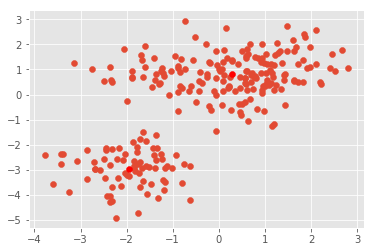

In [87]:
plt.scatter(*points_array.T)

x,y=(new_means.T)
plt.scatter(x,y,color='r')
plt.show()

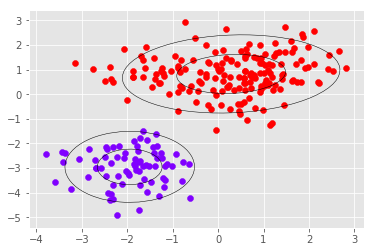

In [88]:

for i in range( no_classes):
    lambda_, v = np.linalg.eig(new_covariances[i])
    
    lambda_ = np.sqrt(lambda_)

    ax = plt.subplot(111)
    for j in range(1,3):
        ell = Ellipse(xy=(new_means[i][0],new_means[i][1]),
                      width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])),color='black')
        ell.set_facecolor('none')
        ax.add_artist(ell)
classes=[np.argmax(prob_mat[i]) for i in range(no_samples) ] 
colors = cm.rainbow(np.linspace(0, 1, no_classes))
for i in range(no_samples):
    plt.scatter(*points_array[i],color=colors[classes[i]])
plt.show()
